In [35]:
import pandas as pd
from matplotlib import pyplot as plt

#### Standard function to plot dendrogram

Run this cell below first

In [36]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


## Hierarchical clustering

### Toy example Hotel.csv

In [37]:
data = pd.read_csv('Hotel.csv',index_col=0)
display(data)

,FACILITY,LOCATION
HOTEL,,
A,3,3
B,6,4
C,2,1
D,8,9
E,7,5
F,10,8


#### Exercise

Run Agglomerative Clustering
- Use single linkage
- set `distance_threshold` to 0
- take note what needs to be done with `n_clusters`, if `distance_threshold` is set to a value explicitly

Refer to documentation

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [38]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(linkage='single', 
                                distance_threshold=0, 
                                n_clusters=None)
model_single = model.fit(data)

print(model_single.children_)
print(model_single.distances_)

[[1 4]
 [0 2]
 [3 5]
 [7 6]
 [9 8]]
[1.41421356 2.23606798 2.23606798 3.16227766 4.12310563]


Plot the dendrogram

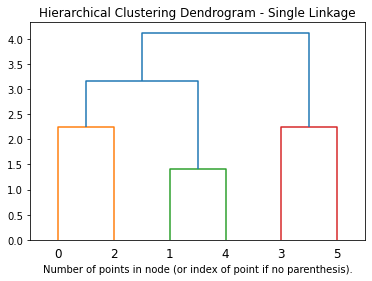

In [39]:
plt.title('Hierarchical Clustering Dendrogram - Single Linkage')
plot_dendrogram(model_single)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

How to interpret the dendrogram:

- 1 and 4 are hotel B and E, Squared Euclidean distance is 2, and Euclidean distance is 1.414, this becomes label 6
- next merge 0 and 2, A and C, Squared Euclidean distance is 5, and Euclidean distance is 2.236, this becomes label 7
- next merge 3 and 5, D and F, Squared Euclidean distance is 5, and Euclidean distance is 2.236, this becomes label 8
- next closest cluster is 6 (B,E) and 7 (A,C), using single linkage, nearest two points are B vs. A; hence Squared Euclidean distance is 10, and Euclidean distance is 3.162, which is the height of the blue line connecting (0,2) and (1,4). This (B,E,A,C) is labelled 9
- Finally we are merging 9 (B,E,A,C) and 8 (D,F). Using single linkage, nearest two points are E vs. F; hence Squared Euclidean distance is 17, and Euclidean distance is 4.123

Show how many clusters are formed

In [ ]:
print(model_single.n_clusters_)

Why are there so many clusters? What does `distance_threshold=0` do to the final results?

Any two clusters with distance above 0 shall not be merged. Hence all observations stay as a single cluster. Totally 6 clusters.

#### Exercise
Let's set distance_threshold to 2.5, how many clusters will be formed based on the dendrogram above?

In [40]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(linkage='single', 
                                distance_threshold=2.5, 
                                n_clusters=None)
model_single = model.fit(data)

print(model_single.children_)
print(model_single.distances_)

[[1 4]
 [0 2]
 [3 5]
 [7 6]
 [9 8]]
[1.41421356 2.23606798 2.23606798 3.16227766 4.12310563]


Show how many clusters are formed

In [42]:
print(model_single.n_clusters_)

3


In [43]:
print(model_single.labels_)

[2 1 2 0 1 0]


#### Interpret and give the clusters appropriate names, in order to illustrate each cluster’s pattern

Create a new table with the original data PLUS the cluster label

In [44]:
data_cluster = data.copy() # we do not want to modify original data set
data_cluster['cluster'] = model_single.labels_
display(data_cluster)

,FACILITY,LOCATION,cluster
HOTEL,,,
A,3,3,2
B,6,4,1
C,2,1,2
D,8,9,0
E,7,5,1
F,10,8,0


#### Exercise

Give the cluster labels more meaningful names based on the scores

In [ ]:
data_cluster['cluster'] = data_cluster['cluster'].map({0:'star hotel', 1:'average', 2:'below average'})
display(data_cluster)

## Clustering with K-means 

### Toy example Hotel.csv

In [45]:
data = pd.read_csv('Hotel.csv',index_col=0)
display(data)

,FACILITY,LOCATION
HOTEL,,
A,3,3
B,6,4
C,2,1
D,8,9
E,7,5
F,10,8


In [46]:
from sklearn.cluster import KMeans

k = 2
# sklearn's kmeans only uses Euclidean distance 
model = KMeans(n_clusters=k, random_state=0)
model = model.fit(data)

print(model.cluster_centers_)
print(model.labels_)

[[8.33333333 7.33333333]
 [3.66666667 2.66666667]]
[1 1 1 0 0 0]


What is the optimal k value? Try different k values, and plot the elbow line

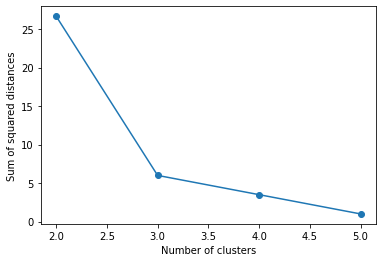

In [47]:
sum_squared_distances = []
for k in range(2, 6):
    model = KMeans(n_clusters=k, random_state=0)
    model = model.fit(data)
    #calculate sum of squared distances of each observation to its own cluster's centroid
    sum_squared_distances.append(model.inertia_)
    
# plot elbow line
fig = plt.figure()
plt.plot(range(2, 6), sum_squared_distances, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

#### Exercise
Rerun K-Means with K=3

In [ ]:
k = 3
model = KMeans(n_clusters=k, random_state=0)
model = model.fit(data)

#### Exercise
Calculate silhouette score

Refer to the documentation https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(data, model.labels_)

### Use FARM_CREDIT.csv for agglomerative clustering

In [48]:
data_orig = pd.read_csv('FARM_CREDIT.csv', index_col=0)
display(data_orig)
print(data_orig.shape)
data_orig.describe()
var_names = data_orig.columns

,NET_INCOME,FR1,FR2,FR3,FR4,FR5
ID,,,,,,
1,7863.858,2.978,0.551,0.634,0.670,0.345
2,9329.172,2.048,0.377,0.748,0.519,0.766
3,12726.490,3.224,0.319,0.478,0.238,0.728
4,5988.046,3.938,0.482,0.350,0.086,0.326
5,6502.307,2.616,0.450,0.621,0.133,0.345
6,7110.178,1.959,0.408,0.697,0.146,0.762
7,8189.929,1.549,0.273,0.878,0.319,17.751
8,7471.071,2.710,0.579,0.537,0.903,0.272
9,6933.622,2.553,0.319,0.502,0.178,0.871


(30, 6)


Performce min-max normalization to standardize all columns to range of [0,1]

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(data_orig)
data_scaled = scaler.transform(data_orig)
data_scaled = pd.DataFrame(data_scaled, columns=var_names)

data_scaled.describe()

,NET_INCOME,FR1,FR2,FR3,FR4,FR5
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.400218,0.415607,0.413884,0.406148,0.499268,0.055094
std,0.276706,0.231174,0.237073,0.266153,0.346322,0.180109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.184882,0.249429,0.234404,0.180626,0.174259,0.009920
50%,0.349186,0.421096,0.385321,0.390017,0.537870,0.014496
75%,0.587632,0.551027,0.566055,0.562606,0.836169,0.031934
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Exercise
- Use 'ward' linkage
- set distance threshold to 1.6
- remember to handle n_clusters if distance_threshold is set

In [50]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(linkage='ward', 
                                distance_threshold=1.6, 
                                n_clusters=None)
model_ward = model.fit(data_scaled)

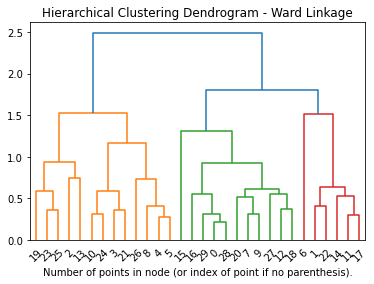

In [51]:
plt.title('Hierarchical Clustering Dendrogram - Ward Linkage')
plot_dendrogram(model_ward)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
print(model_ward.labels_)

#### Exercise
- Use 'ward' linkage
- set n_clusters to 3, and leave distance threshold unspecifified

In [ ]:
model = AgglomerativeClustering(linkage='ward',
                                n_clusters=3)
model_ward = model.fit(data_scaled)
print(model_ward.labels_)

Is the clustering result the same as above with distance_threshold set as 1.6?

Yes

### Use FARM_CREDIT.csv for k-means

What is the optimal k value? Try different k values, and plot the elbow line

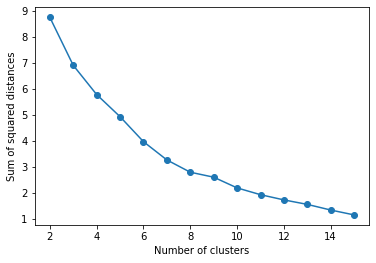

In [52]:
sum_squared_distances = []
for k in range(2, 16):
    model = KMeans(n_clusters=k, random_state=0)
    model = model.fit(data_scaled)
    sum_squared_distances.append(model.inertia_)

fig = plt.figure()
plt.plot(range(2, 16), sum_squared_distances, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

Is it obvious which k is the best?

- Pick the best k in your opinion
- Rerun K-Means
- Check Average silhouette score to assess the clustering quality

In [ ]:
k = 4
model = KMeans(n_clusters=k, random_state=0)
model = model.fit(data_scaled)
print(silhouette_score(data_scaled, model.labels_))

#### Interpret the cluster results
Let's go with 4 clusters and add a cluster integer label into the table

In [53]:
k = 4
model = KMeans(n_clusters=k, random_state=0)
model = model.fit(data_scaled)
print(silhouette_score(data_scaled, model.labels_))

0.24812482820891182


In [55]:
data_scaled["Cluster"] = model.labels_

In [56]:
print("Cluster", 0)
data_scaled[data_scaled["Cluster"]==0].describe()

Cluster 0


,NET_INCOME,FR1,FR2,FR3,FR4,FR5,Cluster
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,0.589666,0.115205,0.320183,0.781726,0.589279,0.189387,0.0
std,0.219198,0.076212,0.205113,0.169826,0.277868,0.397417,0.0
min,0.335257,0.000000,0.053211,0.527919,0.255763,0.009607,0.0
25%,0.431096,0.074503,0.239908,0.693316,0.379802,0.016912,0.0
50%,0.559104,0.122269,0.248624,0.789340,0.566411,0.029987,0.0
75%,0.729779,0.174927,0.469266,0.889171,0.796652,0.048135,0.0
max,0.909431,0.195631,0.590826,1.000000,0.956092,1.000000,0.0


In [57]:
print("Cluster", 1)
data_scaled[data_scaled["Cluster"]==1].describe()

Cluster 1


,NET_INCOME,FR1,FR2,FR3,FR4,FR5,Cluster
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,0.799939,0.638344,0.476697,0.214552,0.510428,0.015326,1.0
std,0.133251,0.202238,0.416896,0.074560,0.353677,0.011970,0.0
min,0.670440,0.540267,0.000000,0.128596,0.166850,0.001194,1.0
25%,0.717370,0.546136,0.137615,0.165821,0.196487,0.008243,1.0
50%,0.745366,0.552657,0.488073,0.225042,0.472009,0.013814,1.0
75%,0.866520,0.552657,0.757798,0.228426,0.716795,0.021090,1.0
max,1.000000,1.000000,1.000000,0.324873,1.000000,0.032289,1.0


In [58]:
print("Cluster", 2)
data_scaled[data_scaled["Cluster"]==2].describe()

Cluster 2


,NET_INCOME,FR1,FR2,FR3,FR4,FR5,Cluster
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,0.231712,0.482375,0.398981,0.295920,0.102695,0.018501,2.0
std,0.134417,0.226936,0.210740,0.237792,0.078006,0.013276,0.0
min,0.012615,0.133681,0.137615,0.000000,0.000000,0.001535,2.0
25%,0.151170,0.327356,0.229358,0.086294,0.051592,0.010517,2.0
50%,0.262858,0.463645,0.377982,0.294416,0.075741,0.014326,2.0
75%,0.339441,0.680470,0.506422,0.467005,0.133919,0.030868,2.0
max,0.420971,0.778937,0.816514,0.639594,0.243688,0.040418,2.0


In [59]:
print("Cluster", 3)
data_scaled[data_scaled["Cluster"]==3].describe()

Cluster 3


,NET_INCOME,FR1,FR2,FR3,FR4,FR5,Cluster
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0
mean,0.238344,0.424389,0.452110,0.375804,0.796597,0.027338,3.0
std,0.160834,0.112919,0.176391,0.178583,0.146982,0.038280,0.0
min,0.000000,0.231497,0.227523,0.109983,0.600439,0.000000,3.0
25%,0.149088,0.357515,0.283028,0.204315,0.653677,0.009920,3.0
50%,0.219163,0.422237,0.473394,0.456853,0.841383,0.015178,3.0
75%,0.345118,0.493153,0.601835,0.496616,0.905873,0.023535,3.0
max,0.502474,0.594718,0.686239,0.563452,0.998902,0.131942,3.0


How would you give meaningful names to the 4 clusters based on the distribution of financial numbers? How can the 4 clusters be useful for bank's operation when reviewing each farm's loan application?

e.g. 
- cluster 0 has high FR3 and high FR5
- cluster 1 has high net_income and high FR1
- cluster 2 is lower on all variables 
- cluster 3 has high FR4

Based on the 4 clusters' characteristics, the bank can make loan approval process different for each cluster.

### Dimension Reduction

#### Principle Component Analysis

In [60]:
data = pd.read_csv('High Dimension.csv')
display(data)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.512992,0.565962,0.564163,0.596780,0.596780,0.998992,0.797418,0.809337,0.303526,0.781595,...,0.816488,0.003693,0.623753,0.596778,0.841562,0.278746,0.026901,0.565633,1,0.034046
95,0.529859,0.586023,0.579956,0.637606,0.637606,0.999099,0.797548,0.809443,0.303531,0.781709,...,0.827879,0.001718,0.623735,0.637605,0.842203,0.277826,0.026802,0.565210,1,0.041011
96,0.474187,0.532817,0.524064,0.620526,0.620382,0.999026,0.797426,0.809323,0.303471,0.781577,...,0.797257,0.011141,0.623853,0.620526,0.840113,0.276063,0.026800,0.565199,1,0.080289
97,0.496807,0.570704,0.543552,0.602848,0.602848,0.999005,0.797458,0.809366,0.303569,0.781604,...,0.819659,0.000854,0.624077,0.602848,0.841634,0.277752,0.026824,0.565312,1,0.041761


Run PCA with all components kept

In [61]:
from sklearn import decomposition
pca = decomposition.PCA()
data_pca = pca.fit_transform(data)

Display all components as linear combination of original input variables, with explained_variance, up to component 10

In [62]:
for i, component in enumerate(pca.components_[:10]):
    print("================")
    print("{}-th component: {}% of original variance".format(i, round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("({:.3f} x {:s})".format(value, name) for value, name in zip(component, data.columns)))

0-th component: 24.66% of original variance
(-0.000 x X1) + (-0.000 x X2) + (-0.000 x X3) + (-0.000 x X4) + (-0.000 x X5) + (-0.000 x X6) + (-0.000 x X7) + (-0.000 x X8) + (-0.000 x X9) + (-0.000 x X10) + (0.245 x X11) + (-0.026 x X12) + (-0.000 x X13) + (0.000 x X14) + (-0.000 x X15) + (-0.000 x X16) + (-0.000 x X17) + (-0.000 x X18) + (-0.000 x X19) + (0.000 x X20) + (0.000 x X21) + (0.000 x X22) + (-0.000 x X23) + (-0.000 x X24) + (0.000 x X25) + (-0.000 x X26) + (-0.000 x X27) + (-0.000 x X28) + (-0.094 x X29) + (-0.000 x X30) + (-0.000 x X31) + (0.000 x X32) + (-0.000 x X33) + (-0.000 x X34) + (0.000 x X35) + (0.000 x X36) + (0.000 x X37) + (-0.000 x X38) + (-0.000 x X39) + (0.000 x X40) + (0.000 x X41) + (0.000 x X42) + (-0.000 x X43) + (0.000 x X44) + (0.000 x X45) + (0.000 x X46) + (-0.000 x X47) + (-0.407 x X48) + (-0.210 x X49) + (0.000 x X50) + (0.000 x X51) + (-0.000 x X52) + (-0.000 x X53) + (-0.000 x X54) + (0.000 x X55) + (0.000 x X56) + (-0.000 x X57) + (-0.000 x X58) +

Plot cummulative explained variance against no. of principal components, up to component 10

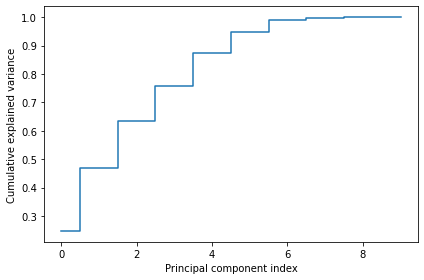

In [63]:
cum_exp_variance = np.cumsum(pca.explained_variance_ratio_[:10])
plt.step(range(0,len(cum_exp_variance)), cum_exp_variance, where='mid')
plt.ylabel('Cumulative explained variance')
plt.xlabel('Principal component index')
plt.tight_layout()
plt.show()

#### Exercise

- How many top components shall we keep to have total explained variance of 80%?
- Run PCA again with only that many top components. Which parameter shall be set?

Refer to documentation

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [64]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
data_pca = pca.fit_transform(data)
display(data_pca)

array([[-7.74174342e+08, -4.72095808e+08, -2.04123693e+09,
        -3.89368608e+08, -1.44608707e+09],
       [-5.70246123e+09, -4.03011198e+09,  3.01753213e+09,
         3.69204617e+09, -1.43360914e+09],
       [-2.63137327e+09,  5.38361255e+09,  5.35555876e+07,
        -3.07914234e+09, -1.85192183e+09],
       [ 2.86061503e+08, -7.22478104e+08,  8.38318153e+09,
         9.78246055e+08,  6.54518735e+09],
       [ 5.91976640e+09,  2.58539233e+09, -1.77537013e+09,
         3.99945205e+09, -1.53449342e+08],
       [ 3.29433276e+09,  3.96434463e+09,  5.74433407e+09,
        -2.33228031e+09,  6.42137268e+09],
       [-1.59885070e+09, -3.18386954e+09, -3.72024639e+09,
        -3.52845491e+07, -2.03468391e+07],
       [ 6.67144403e+09,  2.10228490e+09, -2.22580650e+09,
         5.08238089e+09,  3.31650495e+08],
       [-1.26786091e+09, -2.65594663e+09, -3.24049514e+09,
         8.52949110e+08, -6.78271520e+08],
       [ 4.11902714e+09,  3.29662064e+09, -1.21729572e+09,
         2.36256423e+09

Now we can perform cluster analysis on the top few components from PCA